# Logistic Regression

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def sigmoid(x):
    return 1/(1+np.exp(-x))


def plot_y_pred(y, y_pred):
    # Plotting the true labels and predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y)), y, color='red', marker='o', label='True Labels (y)')
    plt.scatter(range(len(y_pred)), y_pred, color='blue', marker='x', label='Predicted Values (y_pred)')
    plt.axhline(0.5, color='gray', linestyle='--', label='Decision Boundary (0.5)')
    plt.title('True Labels vs Predictions')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()



Likelihood Function

To derive the loss function, we first need to use the maximum likelihood estimation (MLE)

We want to maximize the likelihood of correctly predicting the output y

$$
P(y_i = 1 | x_i; w) = sigmoid(w^T x_i) = y\_pred \\
P(y_i = 0 | x_i; w) = 1 - sigmoid(w^T x_i) = 1 - y\_pred
$$

Combining the likelihood of both binary cases:

$$
\begin{align}
\text{Likelihood} &= \prod_{i}^{N} \left(sigmoid(w^T x_i)^y \cdot (1 - sigmoid(w^T x_i))^{(1-y)} \right) \\
&= \prod_{i}^{N} \left(y\_pred^y \cdot (1 - y\_pred)^{(1-y)}\right)
\end{align}
$$

In [3]:
def likelihood(X, w, y):
    y_pred = sigmoid(np.dot(X, w))
    return y_pred ** y * (1 - y_pred) ** (1 - y)
    

To simplify the calculations, we will take the log of the likelihood function

$$
\text{Likelihood} = \sum_{i}^{N} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right)
$$

and the loss function is just the negative of that

$$
\text{Loss} = - \text{Likelihood} = - \sum_{i}^{N} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right)
$$

In [6]:
def loss(X, w, y):
    return -np.log(likelihood(X, w, y))

Now to optimize the loss function, we need to derive the gradient of the loss function

$$
\begin{align*}
\frac{\partial \text{Loss}}{\partial w} = \frac{\partial}{\partial w} \left(y \log(y\_pred) \cdot (1 - y) \log(1 - y\_pred) \right) \\ 
\because \frac{\partial y\_pred}{\partial x} = \frac{\partial \sigma(x)}{\partial x} = \sigma(x)(1 - \sigma(x)) \\
\therefore -y \frac{y\_pred (1 - y\_pred)}{y\_pred} \; x + (1 - y) \frac{y\_pred (1 - y\_pred)}{1-y\_pred} \; x \tag*{(Applying chain rule)} \\
-y (1 - y\_pred) \cdot x + (1 - y) y\_pred \cdot x \tag*{(Simplification)} \\
(y - y\_pred) \cdot x \tag*{(Simplifying further)} \\
\end{align*}
$$

In [70]:
def loss_gradient(X, w, y):
    """Compute the gradient of the neg-log-loss

    Args:
        X (n_samples, n_features)
        w (n_features)
        y (n_samples)

    Returns: gradient of the loss function (n_features)
    """
    y_pred = sigmoid(np.dot(X, w))
    return np.dot(X.T, (y_pred - y))

Putting all together

In [73]:
def logistic_regression(X, y, learning_rate=0.001, max_iter=1000):
    # initialize the weights to zero, the weight dimension is the same as the number of features
    w = np.zeros(X.shape[1])
    y_pred = sigmoid(np.dot(X, w))
    # plot the relationship between the random predictions and labels
    plot_y_pred(y, y_pred)
    
    for i in range(max_iter):
        if i % (max_iter // 10) == 0:
            print(f"Iteration {i}: {np.mean(loss(X, w, y))=}")

        # update weights
        w -= learning_rate * loss_gradient(X, w, y)
    return w

To Test the implementation

Feature matrix X:
 [[-0.35520435  0.36503337 -0.37946791 -0.19003394  0.04820105 -2.0183763
  -1.59310117  0.84693653 -0.26503163  0.20306456  1.17103293  0.10564231
  -0.39061919  0.09942879 -0.99781577  0.39327964  0.53258156  0.59864874
  -0.51666948 -0.42344273]
 [ 0.66088984 -0.10235759 -0.98812494 -0.47486369  1.20936482 -1.09809806
   0.37342702 -0.31884012  1.06197062 -0.14591573  0.25124237  0.79927432
   1.38803589 -1.21783811  1.66942555 -0.5070874   2.0175605  -0.3011241
   0.92968113  2.87195532]]
Target labels y:
 [0 1]


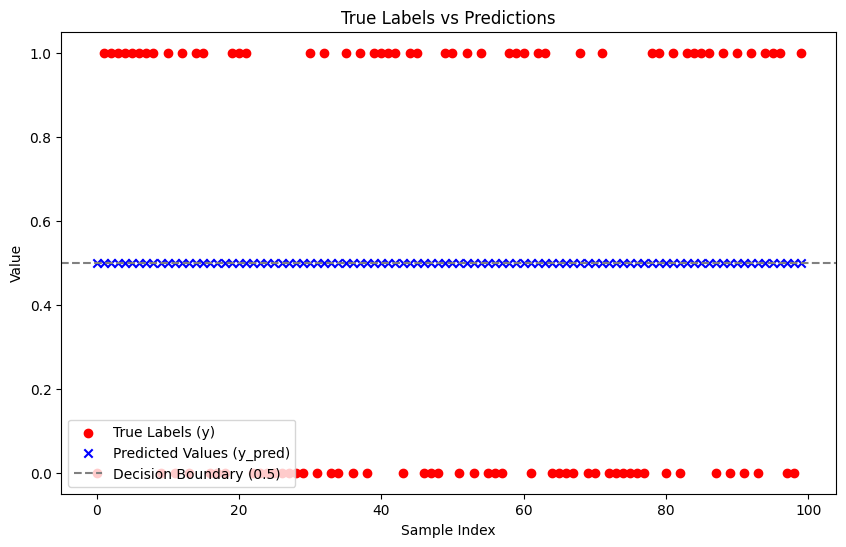

Iteration 0: np.mean(loss(X, w, y))=np.float64(0.6931471805599453)
Iteration 100: np.mean(loss(X, w, y))=np.float64(0.26298409946759166)
Iteration 200: np.mean(loss(X, w, y))=np.float64(0.23383916405097993)
Iteration 300: np.mean(loss(X, w, y))=np.float64(0.22191397058942894)
Iteration 400: np.mean(loss(X, w, y))=np.float64(0.21522756884882582)
Iteration 500: np.mean(loss(X, w, y))=np.float64(0.21094439652366556)
Iteration 600: np.mean(loss(X, w, y))=np.float64(0.2079915173571261)
Iteration 700: np.mean(loss(X, w, y))=np.float64(0.20585742664)
Iteration 800: np.mean(loss(X, w, y))=np.float64(0.2042629424261156)
Iteration 900: np.mean(loss(X, w, y))=np.float64(0.20304159120584264)


In [74]:
# Generate data
X, y = make_classification(n_samples=100, n_features=20)
print("Feature matrix X:\n", X[:2])
print("Target labels y:\n", y[:2])

learned_weights = logistic_regression(X, y)

Let's check the performance of the model

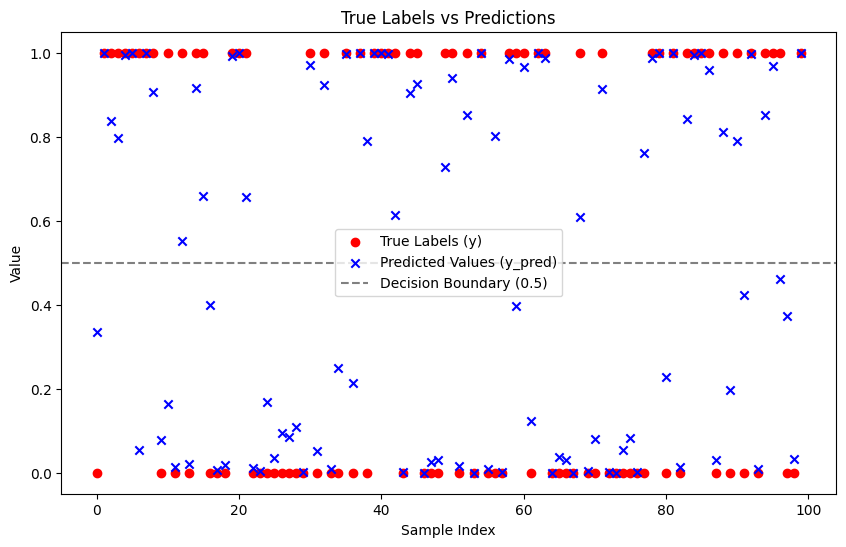

In [75]:
y_pred = sigmoid(np.dot(X, learned_weights))

plot_y_pred(y, y_pred)

